# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [2]:
# Import warnings

import warnings

In [3]:
# Import the libraries you will be using for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [44]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()
file_path = '/content/drive/My Drive/Assignments/EDA/data_NYC_Taxi/trip_records/2023-1.parquet'
df = pd.read_parquet(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [27]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [28]:
# from google.colab import drive
# drive.mount('/content/drive')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/My Drive/Assignments/EDA/data_NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir('/content/drive/My Drive/Assignments/EDA/data_NYC_Taxi/trip_records')
file_loc = '/content/drive/My Drive/Assignments/EDA/data_NYC_Taxi/trip_records'

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(file_loc, file_name)

        # Reading the current file
        df_temp = pd.read_parquet(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()
        df_temp['pickup_year'] = df_temp['tpep_pickup_datetime'].dt.year
        df_temp['pickup_date'] = df_temp['tpep_pickup_datetime'].dt.date
        df_temp['pickup_hour'] = df_temp['tpep_pickup_datetime'].dt.hour

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe
        sampled_data = df_temp.groupby(['pickup_date','pickup_hour']).sample(frac = 0.05, random_state = 42)

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df,sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Error reading file Final_Record.csv: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [31]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_csv('Final_Record.csv', index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [87]:
# Load the new data file

df = pd.read_csv('Final_Record.csv')

In [88]:
# df.head()
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_year,pickup_date,pickup_hour,airport_fee
0,2,2023-02-28 23:56:58,2023-03-01 00:26:21,2.0,10.03,1.0,N,138,33,1,...,10.89,0.0,1.0,65.34,0.0,1.25,2023,2023-02-28,23,NaN
1,2,2023-03-01 00:22:15,2023-03-01 00:27:27,1.0,0.90,1.0,N,90,107,2,...,0.00,0.0,1.0,12.20,2.5,0.00,2023,2023-03-01,0,NaN
2,1,2023-03-01 00:09:59,2023-03-01 00:14:44,1.0,1.00,1.0,N,263,140,1,...,2.45,0.0,1.0,14.65,2.5,0.00,2023,2023-03-01,0,NaN
3,2,2023-03-01 00:00:17,2023-03-01 00:11:28,1.0,2.19,1.0,N,163,90,1,...,3.70,0.0,1.0,22.20,2.5,0.00,2023,2023-03-01,0,NaN
4,2,2023-03-01 00:02:08,2023-03-01 00:16:10,1.0,4.45,1.0,N,140,260,1,...,6.55,0.0,1.0,32.75,2.5,0.00,2023,2023-03-01,0,NaN


In [89]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  Airport_fee            float64
 19  pickup_year            int64  
 20  pickup_date            object 
 21  pickup_hour            int64  
 22  airport_fee       

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [90]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [91]:
# Combine the two airport fee columns
df['airport_fee'] = df['airport_fee'].fillna(0) + df['Airport_fee'].fillna(0)
df.drop('Airport_fee', axis=1, inplace=True)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [50]:
# check where values of fare amount are negative
negative_fare = df[df['fare_amount'] < 0]
print(negative_fare)

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_year, pickup_date, pickup_hour, airport_fee]
Index: []

[0 rows x 22 columns]


Did you notice something different in the `RatecodeID` column for above records?

In [92]:
# Analyse RatecodeID for the negative fare amounts
negative_fare = df[df['RatecodeID'] < 0]
print(negative_fare)


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_year, pickup_date, pickup_hour, airport_fee]
Index: []

[0 rows x 22 columns]


In [93]:
# Find which columns have negative values

cols = df.select_dtypes(include=['number']).columns
negative_value = (df[cols] < 0).sum()
negative_columns = negative_value[negative_value > 0]

print(negative_columns)

extra                     2
mta_tax                  80
improvement_surcharge    88
total_amount             88
congestion_surcharge     56
airport_fee              26
dtype: int64


In [94]:
# fix these negative values
negative_col = negative_columns.index.tolist()

for col in negative_col:
    df.loc[df[col] < 0, col] = 0

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [95]:
# Find the proportion of missing values in each column
total_rows = len(df)
missing_value = df.isnull().sum().to_frame(name='Missing Values')
missing_value['Percentage Missing'] = (missing_value['Missing Values'] / total_rows * 100).round(2)
missing_value.sort_values(by='Percentage Missing', ascending=False, inplace=True)
print(missing_value)


                       Missing Values  Percentage Missing
RatecodeID                      64961                3.43
passenger_count                 64961                3.43
congestion_surcharge            64961                3.43
store_and_fwd_flag              64961                3.43
tpep_pickup_datetime                0                0.00
VendorID                            0                0.00
trip_distance                       0                0.00
tpep_dropoff_datetime               0                0.00
DOLocationID                        0                0.00
PULocationID                        0                0.00
fare_amount                         0                0.00
extra                               0                0.00
mta_tax                             0                0.00
payment_type                        0                0.00
tip_amount                          0                0.00
tolls_amount                        0                0.00
improvement_su

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [96]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
missing_passenger = df[df['passenger_count'].isna()]
missing_passenger.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_year,pickup_date,pickup_hour,airport_fee
89,2,2023-03-01 01:50:00,2023-03-01 02:09:00,NaN,5.57,NaN,NaN,90,7,0,...,0.5,4.91,0.00,1.0,29.47,NaN,2023,2023-03-01,1,0.0
101,2,2023-03-01 01:50:25,2023-03-01 02:14:08,NaN,5.40,NaN,NaN,100,7,0,...,0.5,4.76,0.00,1.0,28.54,NaN,2023,2023-03-01,1,0.0
133,2,2023-03-01 02:11:16,2023-03-01 02:29:27,NaN,4.85,NaN,NaN,100,7,0,...,0.5,4.06,0.00,1.0,24.37,NaN,2023,2023-03-01,2,0.0
153,2,2023-03-01 04:23:43,2023-03-01 04:41:39,NaN,9.05,NaN,NaN,229,138,0,...,0.5,8.12,0.00,1.0,48.73,NaN,2023,2023-03-01,4,0.0
155,2,2023-03-01 04:09:06,2023-03-01 04:26:51,NaN,8.35,NaN,NaN,42,138,0,...,0.5,0.00,6.55,1.0,38.89,NaN,2023,2023-03-01,4,0.0


In [97]:
df['passenger_count'].describe()

,passenger_count
count,1.831439e+06
mean,1.369732e+00
std,8.928760e-01
min,0.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,9.000000e+00


In [98]:
passenger_mode = df['passenger_count'].mode()[0]
passenger_mode

np.float64(1.0)

In [99]:
df['passenger_count'].fillna(passenger_mode, inplace=True)

<ipython-input-99-ff10ac9cb204>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(passenger_mode, inplace=True)


In [100]:
df['passenger_count'].isna().sum()

np.int64(0)

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [101]:
# Fix missing values in 'RatecodeID'
missing_ratecode = df[df['RatecodeID'].isna()]
missing_ratecode.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_year,pickup_date,pickup_hour,airport_fee
89,2,2023-03-01 01:50:00,2023-03-01 02:09:00,1.0,5.57,NaN,NaN,90,7,0,...,0.5,4.91,0.00,1.0,29.47,NaN,2023,2023-03-01,1,0.0
101,2,2023-03-01 01:50:25,2023-03-01 02:14:08,1.0,5.40,NaN,NaN,100,7,0,...,0.5,4.76,0.00,1.0,28.54,NaN,2023,2023-03-01,1,0.0
133,2,2023-03-01 02:11:16,2023-03-01 02:29:27,1.0,4.85,NaN,NaN,100,7,0,...,0.5,4.06,0.00,1.0,24.37,NaN,2023,2023-03-01,2,0.0
153,2,2023-03-01 04:23:43,2023-03-01 04:41:39,1.0,9.05,NaN,NaN,229,138,0,...,0.5,8.12,0.00,1.0,48.73,NaN,2023,2023-03-01,4,0.0
155,2,2023-03-01 04:09:06,2023-03-01 04:26:51,1.0,8.35,NaN,NaN,42,138,0,...,0.5,0.00,6.55,1.0,38.89,NaN,2023,2023-03-01,4,0.0


In [102]:
df['RatecodeID'].describe()

,RatecodeID
count,1.831439e+06
mean,1.649111e+00
std,7.481852e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,9.900000e+01


In [103]:
ratecode_mode = df['RatecodeID'].mode()[0]
ratecode_mode

np.float64(1.0)

In [104]:
df.fillna({'RatecodeID': ratecode_mode}, inplace=True)

In [105]:
df['RatecodeID'].isna().sum()

np.int64(0)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [106]:
# handle null values in congestion_surcharge

missing_surcharge = df[df['congestion_surcharge'].isna()]
missing_surcharge.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_year,pickup_date,pickup_hour,airport_fee
89,2,2023-03-01 01:50:00,2023-03-01 02:09:00,1.0,5.57,1.0,NaN,90,7,0,...,0.5,4.91,0.00,1.0,29.47,NaN,2023,2023-03-01,1,0.0
101,2,2023-03-01 01:50:25,2023-03-01 02:14:08,1.0,5.40,1.0,NaN,100,7,0,...,0.5,4.76,0.00,1.0,28.54,NaN,2023,2023-03-01,1,0.0
133,2,2023-03-01 02:11:16,2023-03-01 02:29:27,1.0,4.85,1.0,NaN,100,7,0,...,0.5,4.06,0.00,1.0,24.37,NaN,2023,2023-03-01,2,0.0
153,2,2023-03-01 04:23:43,2023-03-01 04:41:39,1.0,9.05,1.0,NaN,229,138,0,...,0.5,8.12,0.00,1.0,48.73,NaN,2023,2023-03-01,4,0.0
155,2,2023-03-01 04:09:06,2023-03-01 04:26:51,1.0,8.35,1.0,NaN,42,138,0,...,0.5,0.00,6.55,1.0,38.89,NaN,2023,2023-03-01,4,0.0


In [107]:
df['congestion_surcharge'].describe()

,congestion_surcharge
count,1.831439e+06
mean,2.308195e+00
std,6.653755e-01
min,0.000000e+00
25%,2.500000e+00
50%,2.500000e+00
75%,2.500000e+00
max,2.500000e+00


In [108]:
surcharge_mode = df['congestion_surcharge'].mode()[0]
surcharge_mode

np.float64(2.5)

In [109]:
df.fillna({'congestion_surcharge': surcharge_mode}, inplace=True)

In [110]:
df['congestion_surcharge'].isna().sum()

np.int64(0)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [111]:
# Handle any remaining missing values

df['store_and_fwd_flag'].describe()

,store_and_fwd_flag
count,1831439
unique,2
top,N
freq,1820354


In [112]:
storeflag_mode = df['store_and_fwd_flag'].mode()[0]
storeflag_mode

'N'

In [113]:
df.fillna({'store_and_fwd_flag': storeflag_mode}, inplace=True)

In [114]:
df['store_and_fwd_flag'].isna().sum()

np.int64(0)

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [74]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns



**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [115]:
# remove passenger_count > 6
passenger_morethan6 = df[df['passenger_count'] > 6]
len(passenger_morethan6)

18

In [116]:
df = df[df['passenger_count']<=6]

In [117]:
# Continue with outlier handling

##trip_distance is 0 and fare amount is more that 300
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

In [118]:
#Trip distance = 0 and fare amount = 0  but pickup and dropoff are different
df = df[~((df['trip_distance'] == 0) &
          (df['fare_amount'] == 0) &
          (df['PULocationID'] != df['DOLocationID']))]


In [119]:
#Trip distance is more than 250 miles
df = df[df['trip_distance'] <= 250]

In [120]:
#payment method is not 0
df = df[df['payment_type'].isin([1, 2, 3, 4, 5, 6])]

In [121]:
#only take 2023 dates
df = df[df['pickup_year']!=2022]

In [122]:
#Remove if passenger count = 0
df = df[df['passenger_count'] > 0]

In [123]:
# Do any columns need standardising?
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_year,pickup_hour,airport_fee
count,1.802053e+06,1.802053e+06,1.802053e+06,1.802053e+06,1.802053e+06,1.802053e+06,1.802053e+06,1.802053e+06,1.802053e+06,1.802053e+06,1.802053e+06,1.802053e+06,1.802053e+06,1.802053e+06,1.802053e+06,1802053.0,1.802053e+06,1.802053e+06
mean,1.751218e+00,1.391900e+00,3.471247e+00,1.656932e+00,1.653610e+02,1.642699e+02,1.203880e+00,1.984712e+01,1.606028e+00,4.952994e-01,3.592505e+00,6.030714e-01,9.993523e-01,2.900216e+01,2.307883e+00,2023.0,1.430049e+01,1.445592e-01
std,4.323075e-01,8.825169e-01,4.590794e+00,7.532260e+00,6.365816e+01,6.982798e+01,4.650641e-01,1.841490e+01,1.829791e+00,4.873783e-02,4.105477e+00,2.189526e+00,2.384961e-02,2.307138e+01,6.658707e-01,0.0,5.783246e+00,4.672271e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2023.0,0.000000e+00,0.000000e+00
25%,2.000000e+00,1.000000e+00,1.060000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,2023.0,1.100000e+01,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.790000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.860000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,2023.0,1.500000e+01,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.400000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.470000e+00,0.000000e+00,1.000000e+00,3.080000e+01,2.500000e+00,2023.0,1.900000e+01,0.000000e+00
max,2.000000e+00,6.000000e+00,1.685300e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,8.248000e+02,9.638000e+01,5.750000e+00,4.100000e+02,8.355000e+01,1.000000e+00,8.341000e+02,2.500000e+00,2023.0,2.300000e+01,1.750000e+00


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [124]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_year',
 'pickup_date',
 'pickup_hour',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

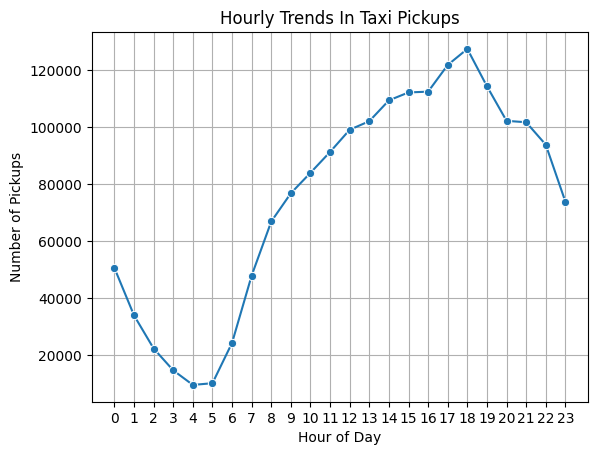

In [125]:
# Find and show the hourly trends in taxi pickups
df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
hourly_trend = df.groupby('pickup_hour').size().reset_index(name='pickup_count')
sns.lineplot(data=hourly_trend, x='pickup_hour', y='pickup_count', marker='o')
plt.title('Hourly Trends In Taxi Pickups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

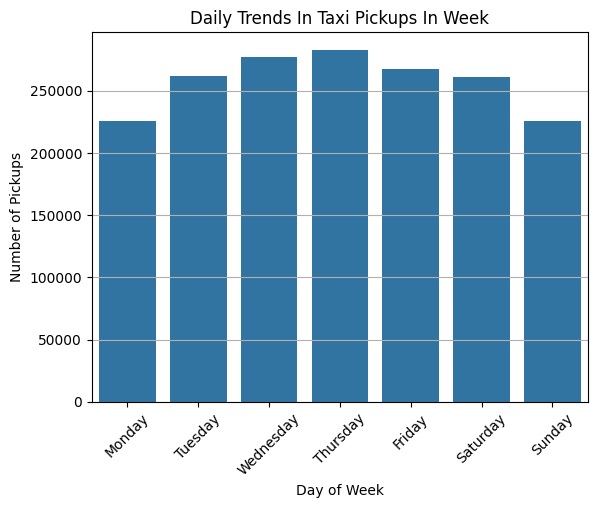

In [126]:
# Find and show the daily trends in taxi pickups (days of the week)

df['pickup_day_of_week'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.day_name()
daily_trend = df.groupby('pickup_day_of_week').size().reset_index(name='pickup_count')
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_trend['pickup_day_of_week'] = pd.Categorical(daily_trend['pickup_day_of_week'], categories=ordered_days, ordered=True)

sns.barplot(data=daily_trend, x='pickup_day_of_week', y='pickup_count')
plt.title('Daily Trends In Taxi Pickups In Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

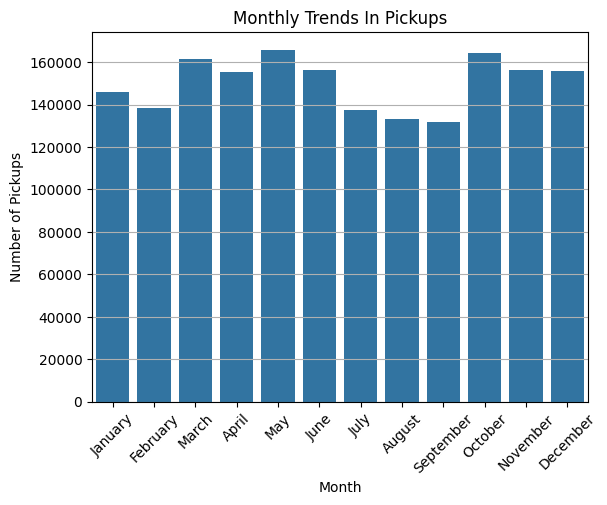

In [127]:
# Show the monthly trends in pickups

df['pickup_month'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.month_name()
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_trend = df.groupby('pickup_month').size().reset_index(name='pickup_count')
monthly_trend['pickup_month'] = pd.Categorical(monthly_trend['pickup_month'], categories=month_order, ordered=True)

sns.barplot(data=monthly_trend, x='pickup_month', y='pickup_count')
plt.title('Monthly Trends In Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [128]:
# Analyse the above parameters

financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
for col in financial_columns:
    zero_value = (df[col] == 0).sum()
    negative_value = (df[col] < 0).sum()
    total = len(df)
    print(f"{col} -- No of Zeros: {zero_value} ({zero_value/total:.2%}), No of Negative Value : {negative_value} ({negative_value/total})")

fare_amount -- No of Zeros: 555 (0.03%), No of Negative Value : 0 (0.0)
tip_amount -- No of Zeros: 401816 (22.30%), No of Negative Value : 0 (0.0)
total_amount -- No of Zeros: 343 (0.02%), No of Negative Value : 0 (0.0)
trip_distance -- No of Zeros: 21341 (1.18%), No of Negative Value : 0 (0.0)


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [129]:
# Create a df with non zero entries for the selected parameters.
df_non_zero = df[(df['fare_amount'] > 0) & (df['total_amount'] > 0) & (df['trip_distance'] > 0) & (df['tip_amount'] > 0)]
df_non_zero.reset_index(drop=True, inplace=True)
df_non_zero.shape

(1392194, 24)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

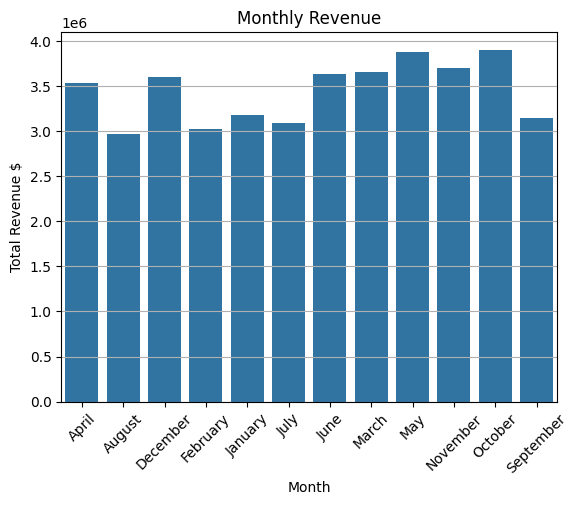

In [130]:
# Group data by month and analyse monthly revenue

df_non_zero.loc[:, 'pickup_month'] = pd.to_datetime(df_non_zero['tpep_pickup_datetime']).dt.month_name()
monthly_revenue = df_non_zero.groupby('pickup_month')['total_amount'].sum().reset_index()

sns.barplot(data=monthly_revenue, x='pickup_month', y='total_amount')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue $')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [131]:
# Calculate proportion of each quarter

df_non_zero.loc[:, 'pickup_quarter'] = pd.to_datetime(df_non_zero['tpep_pickup_datetime']).dt.to_period('Q')
quarterly_revenue = df_non_zero.groupby('pickup_quarter')['total_amount'].sum().reset_index()
quarterly_revenue.columns = ['Quarter', 'Total_Revenue']
total_year_revenue = quarterly_revenue['Total_Revenue'].sum()
quarterly_revenue['Revenue_Share (%)'] = (quarterly_revenue['Total_Revenue'] / total_year_revenue) * 100
quarterly_revenue.sort_values('Quarter')

<ipython-input-131-4f5f5328b66c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero.loc[:, 'pickup_quarter'] = pd.to_datetime(df_non_zero['tpep_pickup_datetime']).dt.to_period('Q')


,Quarter,Total_Revenue,Revenue_Share (%)
0,2023Q1,9865858.96,23.868977
1,2023Q2,11048839.39,26.731022
2,2023Q3,9206687.98,22.274211
3,2023Q4,11212009.74,27.125789


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

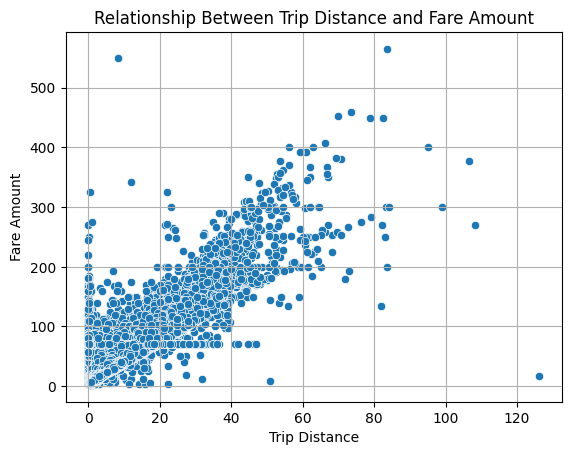

Correlation = : 0.95


In [132]:
# Show how trip fare is affected by distance
df_dist_fare = df_non_zero[
    (df_non_zero['trip_distance'] > 0) &
    (df_non_zero['fare_amount'] > 0)]

sns.scatterplot(data=df_dist_fare, x='trip_distance', y='fare_amount')
plt.title('Relationship Between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

correlation = df_dist_fare['trip_distance'].corr(df_dist_fare['fare_amount'])
print(f'Correlation = : {correlation:.2f}')

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

<ipython-input-133-64d1a64d88a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero.loc[:, 'trip_duration'] = (


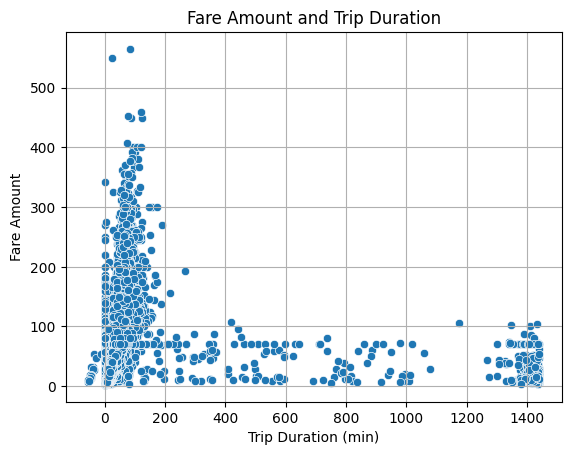

Correlation of fare_amount and trip duration: 0.33


In [133]:
# Show relationship between fare and trip duration
df_non_zero.loc[:, 'trip_duration'] = (
    pd.to_datetime(df_non_zero['tpep_dropoff_datetime']) -
    pd.to_datetime(df_non_zero['tpep_pickup_datetime'])).dt.total_seconds() / 60

sns.scatterplot(data=df_non_zero, x='trip_duration', y='fare_amount')
plt.title('Fare Amount and Trip Duration')
plt.xlabel('Trip Duration (min)')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

correlation = df_non_zero['fare_amount'].corr(df_non_zero['trip_duration'])
print(f'Correlation of fare_amount and trip duration: {correlation:.2f}')


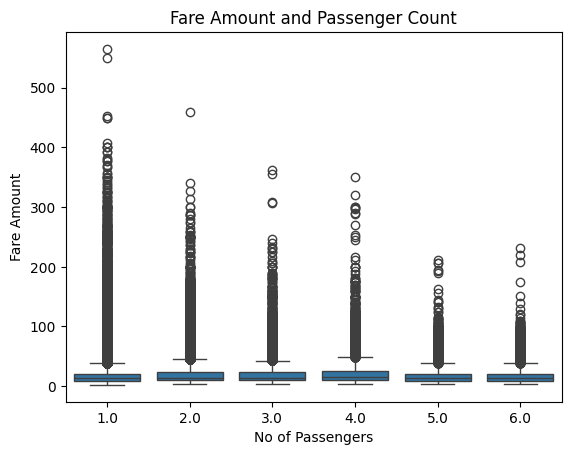

Correlation between fare_amount and passenger_count: 0.04


In [135]:
# Show relationship between fare and number of passengers

sns.boxplot(data=df_non_zero, x='passenger_count', y='fare_amount')
plt.title('Fare Amount and Passenger Count')
plt.xlabel('No of Passengers')
plt.ylabel('Fare Amount')
plt.show()

correlation = df_non_zero['fare_amount'].corr(df_non_zero['passenger_count'])
print(f'Correlation between fare_amount and passenger_count: {correlation:.2f}')

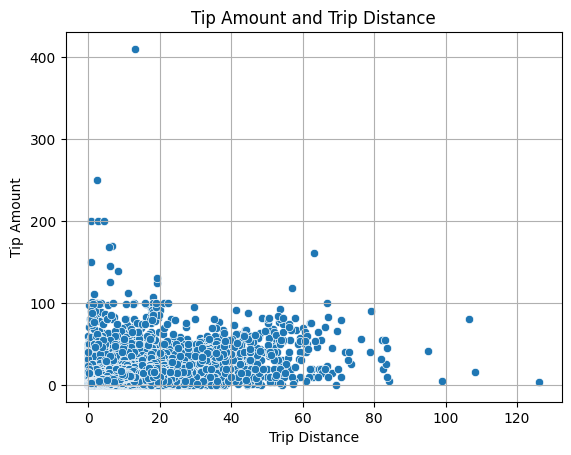

Correlation between tip amount and trip distance: 0.80


In [136]:
# Show relationship between tip and trip distance

sns.scatterplot(data=df_non_zero, x='trip_distance', y='tip_amount')
plt.title('Tip Amount and Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount')
plt.grid(True)
plt.show()

correlation = df_non_zero['tip_amount'].corr(df_non_zero['trip_distance'])
print(f'Correlation between tip amount and trip distance: {correlation:.2f}')


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [137]:
# Analyse the distribution of different payment types (payment_type).

payment_count = df_non_zero['payment_type'].value_counts()
payment_percent = df_non_zero['payment_type'].value_counts(normalize=True) * 100
payment_distribution = pd.DataFrame({'Count': payment_count,'Percentage (%)': payment_percent.round(2)})

payment_distribution

,Count,Percentage (%)
payment_type,,
1,1392146,100.0
2,26,0.0
4,14,0.0
3,8,0.0


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [221]:
# !pip install geopandas
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [138]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/My Drive/Assignments/EDA/data_NYC_Taxi/taxi_zones/taxi_zones.shp')# read the .shp file using gpd
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

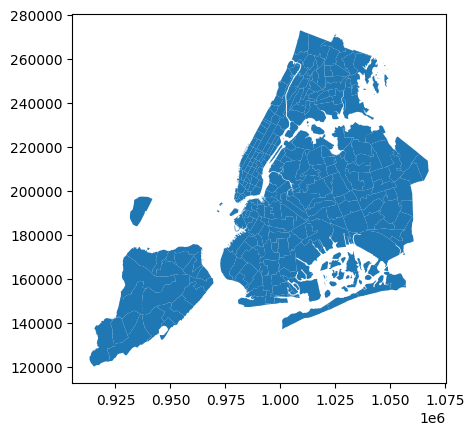

In [139]:
# print(zones.info())
# zones.plot()
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [140]:
# Merge zones and trip records using locationID and PULocationID

df_trip_data = df_non_zero.merge(zones, how='left', left_on='PULocationID', right_on='LocationID')

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [141]:
# Group data by location and calculate the number of trips
pickup_counts = df_non_zero.groupby('PULocationID').size().reset_index(name='num_pickups')
dropoff_counts = df_non_zero.groupby('DOLocationID').size().reset_index(name='num_dropoffs')
combined_counts = pd.merge(pickup_counts, dropoff_counts, left_on='PULocationID', right_on='DOLocationID', how='outer')
combined_counts['total_trips'] = combined_counts['num_pickups'] + combined_counts['num_dropoffs']
location_trip_counts = combined_counts[['PULocationID', 'num_pickups', 'num_dropoffs', 'total_trips']].rename(columns={'PULocationID': 'LocationID'})
location_trip_counts = location_trip_counts.sort_values(by='total_trips', ascending=False)
location_trip_counts.head()


,LocationID,num_pickups,num_dropoffs,total_trips
232,237.0,69037.0,61733.0,130770.0
231,236.0,61759.0,66406.0,128165.0
156,161.0,66339.0,54244.0,120583.0
157,162.0,52139.0,40495.0,92634.0
137,142.0,47580.0,40806.0,88386.0


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [145]:
# Merge trip counts back to the zones GeoDataFrame
gdf_zones_trips = zones.merge(location_trip_counts, how='left', left_on='LocationID', right_on='LocationID')

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

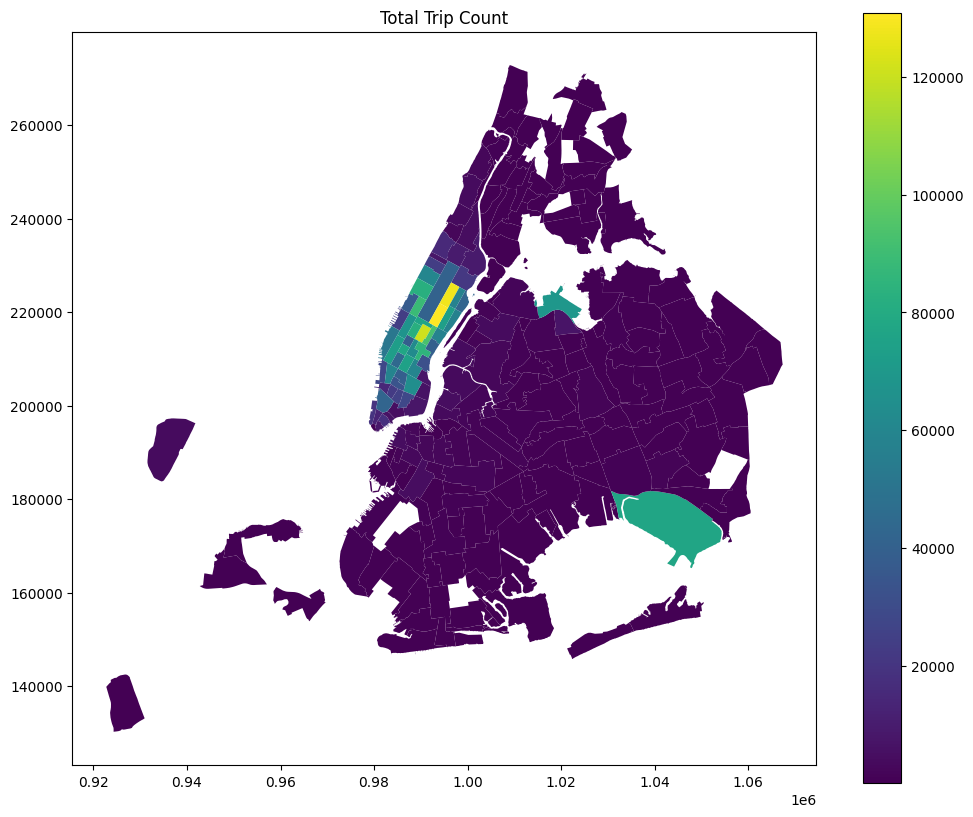

In [144]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
gdf_zones_trips.plot(column='total_trips', ax = ax, legend=True)
plt.title("Total Trip Count")
plt.show()

In [148]:
# can you try displaying the zones DF sorted by the number of trips?
sorted_zones = gdf_zones_trips.sort_values(by='total_trips', ascending=False)
sorted_zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,num_pickups,num_dropoffs,total_trips
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",69037.0,61733.0,130770.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",61759.0,66406.0,128165.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",66339.0,54244.0,120583.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",52139.0,40495.0,92634.0
141,142,0.038176,0.000076,Lincoln Square East,142,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21...",47580.0,40806.0,88386.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [160]:
# Find routes which have the slowest speeds at different times of the day
df_non_zero['tpep_pickup_datetime'] = pd.to_datetime(df_non_zero['tpep_pickup_datetime'])
df_non_zero['tpep_dropoff_datetime'] = pd.to_datetime(df_non_zero['tpep_dropoff_datetime'])
df_non_zero['trip_duration_hours'] = (df_non_zero['tpep_dropoff_datetime'] - df_non_zero['tpep_pickup_datetime']).dt.total_seconds() / 3600

df_non_zero.loc[:, 'route_id'] = (df_non_zero['PULocationID'].astype(str) + "-" + df_non_zero['DOLocationID'].astype(str))
route_hourly_stats = df_non_zero.groupby(['route_id', 'pickup_hour']).agg({
    'trip_distance': 'mean',
    'trip_duration_hours': 'mean',
    'PULocationID': 'first',
    'DOLocationID': 'first'
}).reset_index()

route_hourly_stats['average_speed'] = (route_hourly_stats['trip_distance'] / route_hourly_stats['trip_duration_hours'])
slow_routes = route_hourly_stats.sort_values(by='average_speed').head()
slow_routes

<ipython-input-160-6af55adc3553>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero['tpep_pickup_datetime'] = pd.to_datetime(df_non_zero['tpep_pickup_datetime'])
<ipython-input-160-6af55adc3553>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero['tpep_dropoff_datetime'] = pd.to_datetime(df_non_zero['tpep_dropoff_datetime'])
<ipython-input-160-6af55adc3553>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,route_id,pickup_hour,trip_distance,trip_duration_hours,PULocationID,DOLocationID,average_speed
6044,114-120,1,9.88,-0.200833,114,120,-49.195021
36822,162-133,1,14.50,-0.598056,162,133,-24.245239
100182,88-211,1,2.30,-0.750556,88,211,-3.064397
66216,237-264,2,1.11,22.195278,237,264,0.050011
32902,157-80,3,2.09,23.970000,157,80,0.087192


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

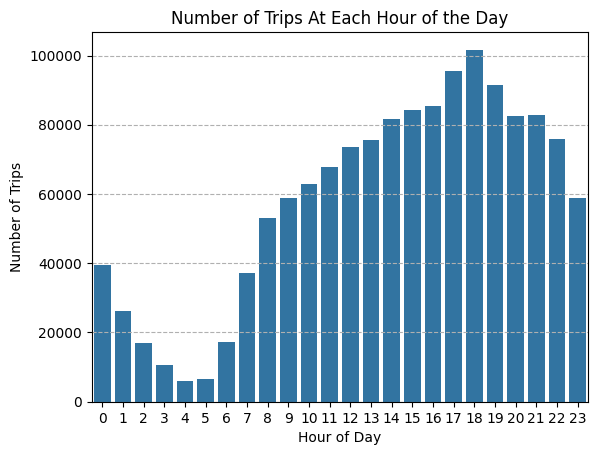

Busiest hour is 18:00 with 101,681 trips.


In [161]:
# Visualise the number of trips per hour and find the busiest hour
hour_trip_counts = df_non_zero['pickup_hour'].value_counts().sort_index()


sns.barplot(x=hour_trip_counts.index, y=hour_trip_counts.values)

plt.title("Number of Trips At Each Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.grid(axis='y', linestyle='--')
plt.show()

# busiest hour
busiest_hour = hour_trip_counts.idxmax()
max_trips = hour_trip_counts.max()

print(f"Busiest hour is {busiest_hour}:00 with {max_trips:,} trips.")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [165]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

hour_trip_counts = df['pickup_hour'].value_counts().sort_values(ascending=False)
five_busiest_hour = hour_trip_counts.head()

scaled_up_value = (five_busiest_hour / sample_fraction).astype(int)

print("Five busiest hour after scalling up")
scaled_up_value


Five busiest hour after scalling up


,count
pickup_hour,
18,2549240
17,2436500
19,2287040
16,2249040
15,2243560


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

<ipython-input-168-8eab900b8b10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero['tpep_pickup_datetime'] = pd.to_datetime(df_non_zero['tpep_pickup_datetime'])
<ipython-input-168-8eab900b8b10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero['day_of_week'] = df_non_zero['tpep_pickup_datetime'].dt.dayofweek
<ipython-input-168-8eab900b8b10>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

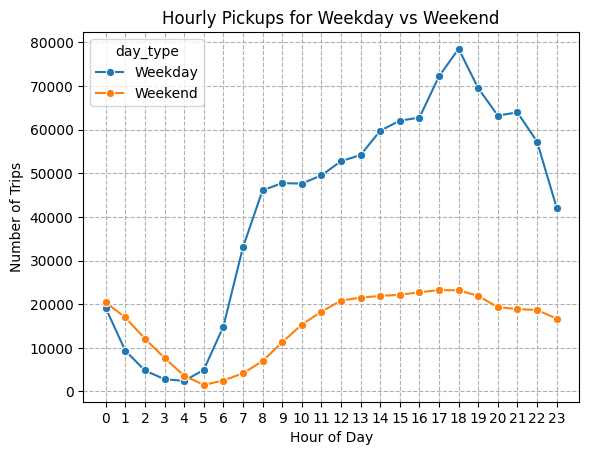

In [168]:
# Compare traffic trends for the week days and weekends
df_non_zero['tpep_pickup_datetime'] = pd.to_datetime(df_non_zero['tpep_pickup_datetime'])
df_non_zero['day_of_week'] = df_non_zero['tpep_pickup_datetime'].dt.dayofweek
df_non_zero['day_type'] = df_non_zero['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
hourly_comparison = df_non_zero.groupby(['pickup_hour', 'day_type']).size().reset_index(name='trip_count')

sns.lineplot(data=hourly_comparison, x='pickup_hour', y='trip_count', hue='day_type', marker='o')

plt.title('Hourly Pickups for Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--')
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [170]:
# Find top 10 pickup and dropoff zones

top_zone_pickup = df_non_zero.groupby('PULocationID').size().sort_values(ascending=False).head(10)
top_zone_dropoff= df_non_zero.groupby('DOLocationID').size().sort_values(ascending=False).head(10)
print("Top 10 Pickup Zones:\n", top_zone_pickup ,"\n")
print("Top 10 Dropoff Zones:\n", top_zone_dropoff)

Top 10 Pickup Zones:
 PULocationID
237    69037
161    66339
132    63500
236    61759
162    52139
138    51183
186    47997
142    47580
230    44206
170    42588
dtype: int64 

Top 10 Dropoff Zones:
 DOLocationID
236    66406
237    61733
161    54244
170    42388
239    42158
142    40806
162    40495
141    39103
230    38478
68     35522
dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [175]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts = df_non_zero.groupby('PULocationID').size().reset_index(name='pickup_count')
dropoff_counts = df_non_zero.groupby('DOLocationID').size().reset_index(name='dropoff_count')
pickup_counts.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
dropoff_counts.rename(columns={'DOLocationID': 'LocationID'}, inplace=True)
zone_ratios = pd.merge(pickup_counts, dropoff_counts, on='LocationID', how='outer')
zone_ratios['pickup_drop_ratio'] = zone_ratios['pickup_count'] / zone_ratios['dropoff_count']
top_10_ratio = zone_ratios.sort_values(by='pickup_drop_ratio', ascending=False).head(10)
bottom_10_ratio = zone_ratios.sort_values(by='pickup_drop_ratio', ascending=True).head(10)

print("Top 10 Zone Pickup/Dropoff Ratio:\n", top_10_ratio,"\n")
print("Bottom 10 Zones by Pickup/Dropoff Ratio:\n", bottom_10_ratio)

Top 10 Zone Pickup/Dropoff Ratio:
      LocationID  pickup_count  dropoff_count  pickup_drop_ratio
69           70        6312.0          449.0          14.057906
127         132       63500.0        13519.0           4.697093
133         138       51183.0        17809.0           2.873996
181         186       47997.0        29168.0           1.645536
109         114       19635.0        14102.0           1.392356
42           43       23601.0        17085.0           1.381387
244         249       33642.0        25168.0           1.336697
157         162       52139.0        40495.0           1.287542
98          100       21327.0        17336.0           1.230215
156         161       66339.0        54244.0           1.222974 

Bottom 10 Zones by Pickup/Dropoff Ratio:
      LocationID  pickup_count  dropoff_count  pickup_drop_ratio
90           91           1.0          157.0           0.006369
166         171           1.0          150.0           0.006667
160         165          

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [178]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hours = list(range(0, 6)) + [23]
df_night_hour = df_non_zero[df_non_zero['pickup_hour'].isin(night_hours)]

top_zone_nightpickup = df_night_hour.groupby('PULocationID').size().sort_values(ascending=False).head(10)
top_zone_nightdropoff= df_night_hour.groupby('DOLocationID').size().sort_values(ascending=False).head(10)
print("Top 10 Pickup Zones:\n", top_zone_nightpickup ,"\n")
print("Top 10 Dropoff Zones:\n", top_zone_nightdropoff)

Top 10 Pickup Zones:
 PULocationID
79     12516
249    10526
132     9643
48      7933
148     7879
114     7358
230     5766
186     5338
164     4801
138     4719
dtype: int64 

Top 10 Dropoff Zones:
 DOLocationID
79     6819
48     5066
170    5030
107    4747
68     4358
141    4314
263    4299
249    4163
236    3614
239    3561
dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [177]:
# Filter for night hours (11 PM to 5 AM)

night_hours = list(range(0, 6)) + [23]
df_night_hour = df_non_zero[df_non_zero['pickup_hour'].isin(night_hours)]
df_night_hour.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_hour,airport_fee,pickup_day_of_week,pickup_month,pickup_quarter,trip_duration,trip_duration_hours,route_id,day_of_week,day_type
0,2,2023-02-28 23:56:58,2023-03-01 00:26:21,2.0,10.03,1.0,N,138,33,1,...,23,1.25,Tuesday,February,2023Q1,29.383333,0.489722,138-33,1,Weekday
1,1,2023-03-01 00:09:59,2023-03-01 00:14:44,1.0,1.00,1.0,N,263,140,1,...,0,0.00,Wednesday,March,2023Q1,4.750000,0.079167,263-140,2,Weekday
2,2,2023-03-01 00:00:17,2023-03-01 00:11:28,1.0,2.19,1.0,N,163,90,1,...,0,0.00,Wednesday,March,2023Q1,11.183333,0.186389,163-90,2,Weekday
3,2,2023-03-01 00:02:08,2023-03-01 00:16:10,1.0,4.45,1.0,N,140,260,1,...,0,0.00,Wednesday,March,2023Q1,14.033333,0.233889,140-260,2,Weekday
4,2,2023-03-01 00:32:21,2023-03-01 00:39:09,1.0,1.96,1.0,N,231,68,1,...,0,0.00,Wednesday,March,2023Q1,6.800000,0.113333,231-68,2,Weekday


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [179]:
# Analyse the fare per mile per passenger for different passenger counts

df_fare = df_non_zero.copy()
df_fare['fare_per_mile_per_passenger'] = (df_fare['fare_amount'] / df_fare['trip_distance'] / df_fare['passenger_count'])
avg_fare_per_passenger = df_fare.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
avg_fare_per_passenger.columns = ['Passenger Count', 'Avg Fare per Mile per Passenger']
avg_fare_per_passenger



,Passenger Count,Avg Fare per Mile per Passenger
0,1.0,9.205872
1,2.0,5.127523
2,3.0,3.281343
3,4.0,4.520548
4,5.0,1.543642
5,6.0,1.328807


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

<ipython-input-183-77e9d83689b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero['tpep_pickup_datetime'] = pd.to_datetime(df_non_zero['tpep_pickup_datetime'])
<ipython-input-183-77e9d83689b4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero['pickup_day_of_week'] = df_non_zero['tpep_pickup_datetime'].dt.day_name()
<ipython-input-183-77e9d83689b4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

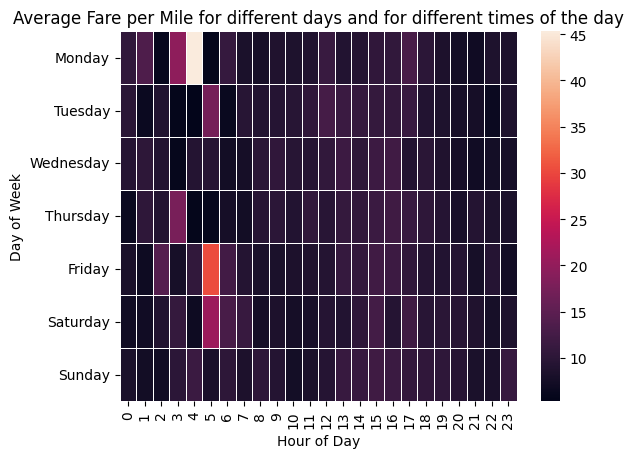

In [183]:
# Compare the average fare per mile for different days and for different times of the day

df_non_zero['tpep_pickup_datetime'] = pd.to_datetime(df_non_zero['tpep_pickup_datetime'])
df_non_zero['pickup_day_of_week'] = df_non_zero['tpep_pickup_datetime'].dt.day_name()
df_non_zero['pickup_hour'] = df_non_zero['tpep_pickup_datetime'].dt.hour

df_avarage = df_non_zero.copy()
df_avarage['fare_per_mile'] = df_avarage['fare_amount'] / df_avarage['trip_distance']

heatmap_data = df_avarage.pivot_table(
    values='fare_per_mile',
    index='pickup_day_of_week',
    columns='pickup_hour',
    aggfunc='mean'
)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(weekday_order)

sns.heatmap(heatmap_data, linewidths=.5)
plt.title('Average Fare per Mile for different days and for different times of the day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

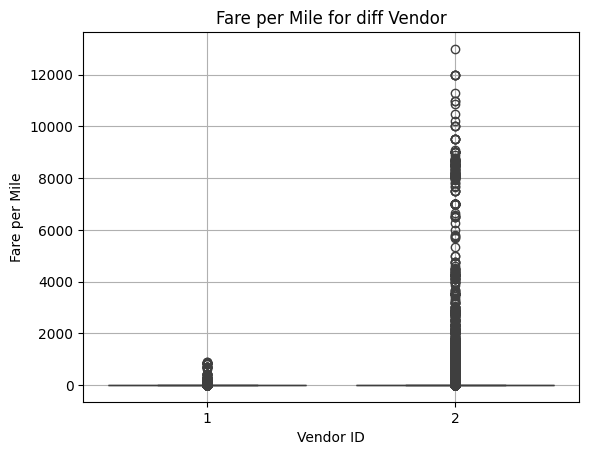

In [185]:
# Compare fare per mile for different vendors

df_fare = df_non_zero.copy()
df_fare['fare_per_mile'] = df_fare['fare_amount'] / df_fare['trip_distance']

sns.boxplot(data=df_fare, x='VendorID', y='fare_per_mile')

plt.title('Fare per Mile for diff Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Fare per Mile')
plt.grid(True)
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [187]:
# Defining distance tiers
bins = [0, 2, 5, float('inf')]
labels = ['Less than <=2 miles', 'Between 2-5 miles', '>5 miles and above']
df_fare['distance_bin'] = pd.cut(df_fare['trip_distance'], bins=bins, labels=labels)
df_fare['distance_bin'].value_counts()


,count
distance_bin,
Less than <=2 miles,767646
Between 2-5 miles,392205
>5 miles and above,232343


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [190]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df_fare['tip_percent'] = (df_fare['tip_amount'] / df_fare['fare_amount']) * 100
df_fare['distance_tier'] = pd.cut(df_fare['trip_distance'], bins=bins, labels=labels, include_lowest=True)

tip_by_distance = df_fare.groupby('distance_tier')['tip_percent'].mean().sort_index()
tip_by_passenger = df_fare.groupby('passenger_count')['tip_percent'].mean().sort_index()
tip_by_hour = df_fare.groupby('pickup_hour')['tip_percent'].mean().sort_index()

print(tip_by_distance,"\n")
print(tip_by_passenger,"\n")
print(tip_by_hour)

distance_tier
Less than <=2 miles    28.808262
Between 2-5 miles      23.155718
>5 miles and above     22.074602
Name: tip_percent, dtype: float64 

passenger_count
1.0    26.151978
2.0    25.850120
3.0    25.842150
4.0    26.112019
5.0    26.112054
6.0    25.920522
Name: tip_percent, dtype: float64 

pickup_hour
0     25.913466
1     26.246134
2     26.779700
3     26.778731
4     27.025332
5     26.412746
6     25.167057
7     25.035655
8     24.966738
9     25.369130
10    25.582965
11    25.461888
12    25.386966
13    25.296990
14    25.174657
15    25.050146
16    27.108912
17    27.231580
18    27.585172
19    27.528900
20    26.385013
21    26.253177
22    25.953091
23    25.713958
Name: tip_percent, dtype: float64


<ipython-input-190-c7c11cbda963>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_by_distance = df_fare.groupby('distance_tier')['tip_percent'].mean().sort_index()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [191]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

low_tip = df_fare[df_fare['tip_percent'] < 10]
high_tip = df_fare[df_fare['tip_percent'] > 25]
low_tip_stats = low_tip[['trip_distance', 'fare_amount', 'passenger_count', 'pickup_hour']].describe()
high_tip_stats = high_tip[['trip_distance', 'fare_amount', 'passenger_count', 'pickup_hour']].describe()

print("Low Tip % <10% :\n", low_tip_stats)
print("\nHigh Tip % >25% :\n", high_tip_stats)

Low Tip % <10% :
        trip_distance   fare_amount  passenger_count   pickup_hour
count   74224.000000  74224.000000     74224.000000  74224.000000
mean        4.916068     26.494112         1.373949     14.119584
std         5.634249     23.096967         0.866021      6.092885
min         0.010000      3.000000         1.000000      0.000000
25%         1.720000     12.800000         1.000000     10.000000
50%         2.700000     19.100000         1.000000     15.000000
75%         5.240000     29.600000         1.000000     19.000000
max       108.200000    565.100000         6.000000     23.000000

High Tip % >25% :
        trip_distance    fare_amount  passenger_count    pickup_hour
count  800848.000000  800848.000000    800848.000000  800848.000000
mean        2.310906      14.454238         1.369319      14.607168
std         2.934798      11.772467         0.866115       5.821221
min         0.010000       2.100000         1.000000       0.000000
25%         0.930000       7

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

<ipython-input-193-504cc9841403>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero['pickup_day'] = pd.to_datetime(df_non_zero['pickup_date']).dt.day_name()


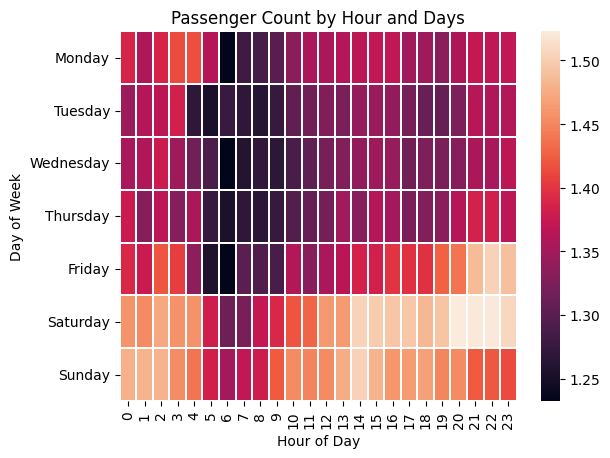

In [193]:
# See how passenger count varies across hours and days

df_non_zero['pickup_day'] = pd.to_datetime(df_non_zero['pickup_date']).dt.day_name()

heatmap_data = df_non_zero.groupby(['pickup_day', 'pickup_hour'])['passenger_count'].mean().reset_index()
heatmap_pivot = heatmap_data.pivot(index='pickup_day', columns='pickup_hour', values='passenger_count')

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_pivot = heatmap_pivot.reindex(ordered_days)

sns.heatmap(heatmap_pivot, linewidths=0.3)
plt.title('Passenger Count by Hour and Days')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [195]:
# How does passenger count vary across zones
zone_passenger = df_non_zero.groupby('PULocationID').agg({'passenger_count': ['count', 'mean']}).reset_index()

zone_passenger.columns = ['PULocationID', 'total_trips', 'avg_passenger_count']

zone_info = zones.merge(zone_passenger, left_on='LocationID', right_on='PULocationID', how='left')

top_zone = zone_info.sort_values(by='avg_passenger_count', ascending=False).head()
top_zone



,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,total_trips,avg_passenger_count
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",3.0,1.0,5.0
46,47,0.089828,0.000163,Claremont/Bathgate,47,Bronx,"POLYGON ((1014430.835 250474.121, 1014081.534 ...",47.0,2.0,3.0
107,108,0.111171,0.000353,Gravesend,108,Brooklyn,"POLYGON ((992169.272 156843.405, 992212.136 15...",108.0,2.0,3.0
152,153,0.024737,0.000032,Marble Hill,153,Manhattan,"POLYGON ((1010061.703 258338.334, 1009990.141 ...",153.0,3.0,3.0
211,212,0.067129,0.000161,Soundview/Bruckner,212,Bronx,"POLYGON ((1016294.401 239138.171, 1016244.934 ...",212.0,1.0,3.0


In [199]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

pickup_counts = df_non_zero.groupby('PULocationID').size().reset_index(name='pickup_counts')
pickup_counts.columns = ['LocationID', 'pickup_counts']
zones_with_trips = zones.merge(pickup_counts, left_on='LocationID', right_on='LocationID', how='left')
avg_passenger = df_non_zero.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger.columns = ['LocationID', 'avg_passenger_count']
zones_with_trips = zones_with_trips.merge(avg_passenger, on='LocationID', how='left')
zones_with_trips[['LocationID', 'zone', 'avg_passenger_count']].head()


,LocationID,zone,avg_passenger_count
0,1,Newark Airport,1.717949
1,2,Jamaica Bay,1.000000
2,3,Allerton/Pelham Gardens,5.000000
3,4,Alphabet City,1.473916
4,5,Arden Heights,NaN


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [201]:
# How often is each surcharge applied?

surcharge_counts = df_non_zero['extra'].value_counts().sort_index()
surcharge_percent = (surcharge_counts / len(df_non_zero)) * 100
surcharge_analysis = pd.DataFrame({'Surcharge Amount': surcharge_counts.index,'Trip Count': surcharge_counts.values,'Percentage': surcharge_percent.round(2).values})
surcharge_analysis

,Surcharge Amount,Trip Count,Percentage
0,0.00,518755,37.26
1,0.01,1,0.00
2,0.11,1,0.00
3,0.15,1,0.00
4,0.25,2,0.00
5,0.50,16,0.00
6,0.70,3,0.00
7,0.75,5,0.00
8,0.77,1,0.00
9,1.00,288488,20.72


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [201]:
Optimizing Routing will be in the evening time after 5 till 9, especially in the manhattan and airport areas and even more so on weekends. Increasing taxi availability in these zones during peak times can improve service coverage and reduce wait times.
And also found that during night time 11 to early morning 5 or 6 taxis generating high revenue per trip.Targeting these hours with better coverage and smarter shift scheduling could boost overall earnings.

Additionally, rerouting drivers through shorter, less congested routes improves both efficiency and customer satisfaction.

Short trips (<2 miles) offer higher fare per mile, and tip percentages are typically better for rides with fewer passengers or during night hours—making them ideal candidates for premium services.

conclusion:-
-priotize high demand zones during peak hour
-Use shorter, alternate routes to avoid traffic delays.
-schulde more drivers at night for higher revenue
-notify driver for upcoming high demand periods
-Target short-distance night rides for premium or surge pricing models.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [201]:
-Identify zones with high demand zones pickup to dropoff ratio and keep cabs ready in nearby drop off zones to quickly balance the supply

-Use real-time monitoring to track top zones by hourly activity and continuously update driver distribution.

-Consider seasonal adjustments—more cabs in tourist-frequented areas during holidays or large events (e.g., Times Square in December)

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [201]:
To increase  revenue while staying competitive, a dynamic pricing model should be introduced, adjusting fares based on demand and time of day. Surge pricing during peak hours like rush hours and weekends can help capture higher demand, while offering tiered pricing for short trips under 2 miles can encourage more riders. For nighttime rides, a slight premium can be added due to the higher revenue potential. Additionally, encouraging tips by displaying suggested tip amounts for longer or night-time trips can help increase tip revenue. It's also important to keep an eye on what other companies are charging regularly monitoring competitor pricing ensures we stay competitive without cutting down the revenue. And we can also adjust fares for busy seasons oe special events like summer holiday or a concert can help us making the most of increased demand maybe we can introduce special discount with some condition so that we dont loose revenue but still make profit. This will ensure we make the maximize revenue while providong a great customer experience.